# Explore here

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



<function matplotlib.pyplot.show(close=None, block=None)>

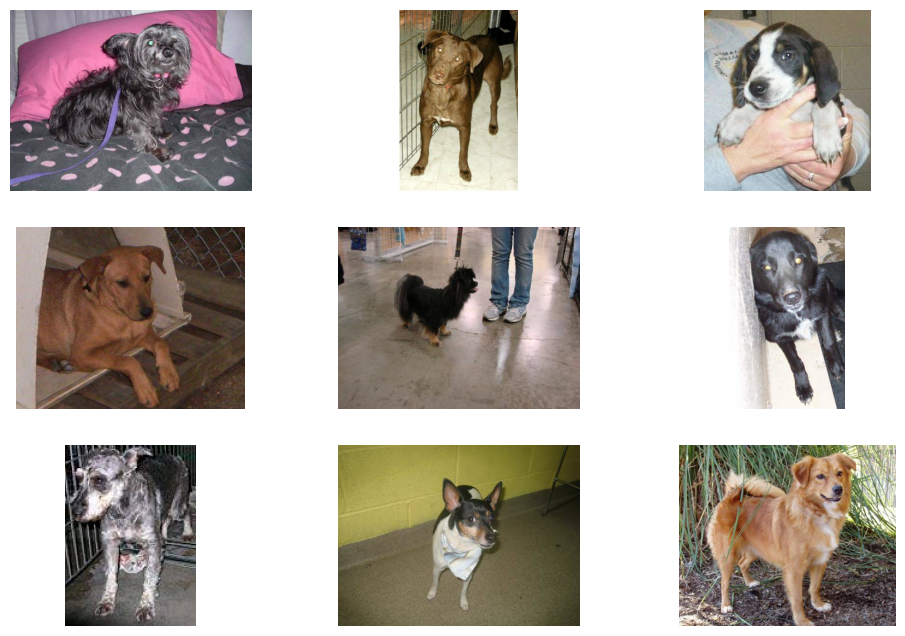

In [27]:
#imprimo en pantalla las primeras nueve fotos con el nombre "dog"

def load_dog_photos():
    dog_photos = []
    for filename in os.listdir('../data/raw/'):
        if 'dog' in filename and filename.endswith('.jpg'):
            dog_photos.append(Image.open(os.path.join('../data/raw/', filename)))
            if len(dog_photos) == 9:
                break
    return dog_photos

dog_photos = load_dog_photos()

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_photos[i])
    plt.axis('off')
    

plt.show
    



<function matplotlib.pyplot.show(close=None, block=None)>

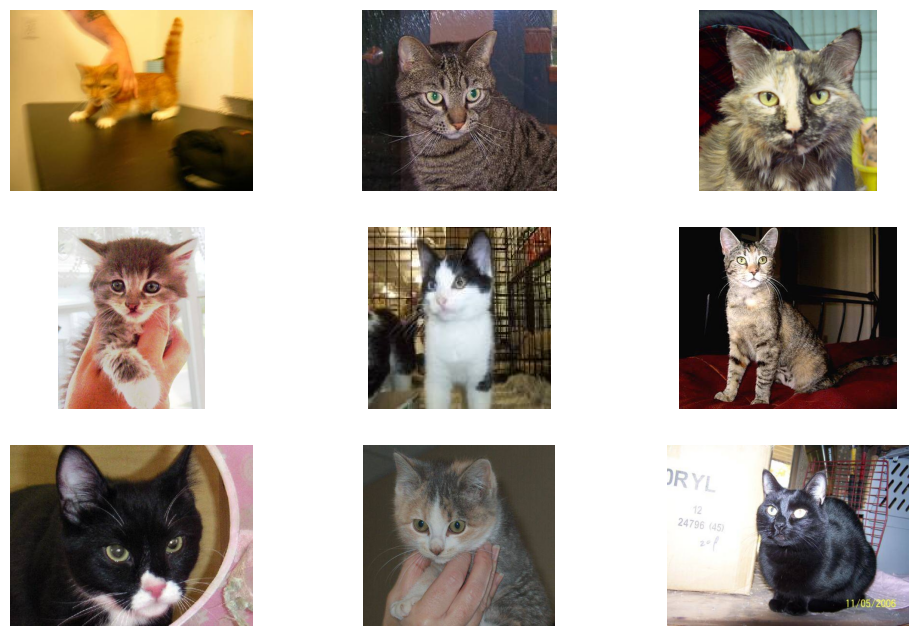

In [28]:
#imprimo en pantalla las primeras nueve fotos con el nombre "cat"


def load_cat_photos():
    cat_photos = []
    for filename in os.listdir('../data/raw/'):
        if 'cat' in filename and filename.endswith('.jpg'):
            cat_photos.append(Image.open(os.path.join('../data/raw/', filename)))
            if len(cat_photos) == 9:
                break
    return cat_photos

cat_photos = load_cat_photos()

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cat_photos[i])
    plt.axis('off')
    

plt.show
    



In [4]:
#creo subdirectorio para las imagenes en /data/raw para las imagenes que comiencen con "cat" y que comiencen con "dog" para poder categorizar 

import os

os.makedirs('../data/raw/dog', exist_ok=True)
os.makedirs('../data/raw/cat', exist_ok=True)

for filename in os.listdir('../data/raw/'):
    if 'cat' in filename and filename.endswith('.jpg'):
        os.rename(os.path.join('../data/raw/', filename), os.path.join('../data/raw/cat/', filename))
    if 'dog' in filename and filename.endswith('.jpg'):
        os.rename(os.path.join('../data/raw/', filename), os.path.join('../data/raw/dog/', filename))


In [2]:
batch_size = 32
img_height = 200
img_width = 200
data_dir= '../data/raw/'

In [3]:
#Defino las variables train_ds y val_ds
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )
  


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [5]:
#Compruebo que haya dos clases

class_names = train_ds.class_names
print(class_names)


['cat', 'dog']


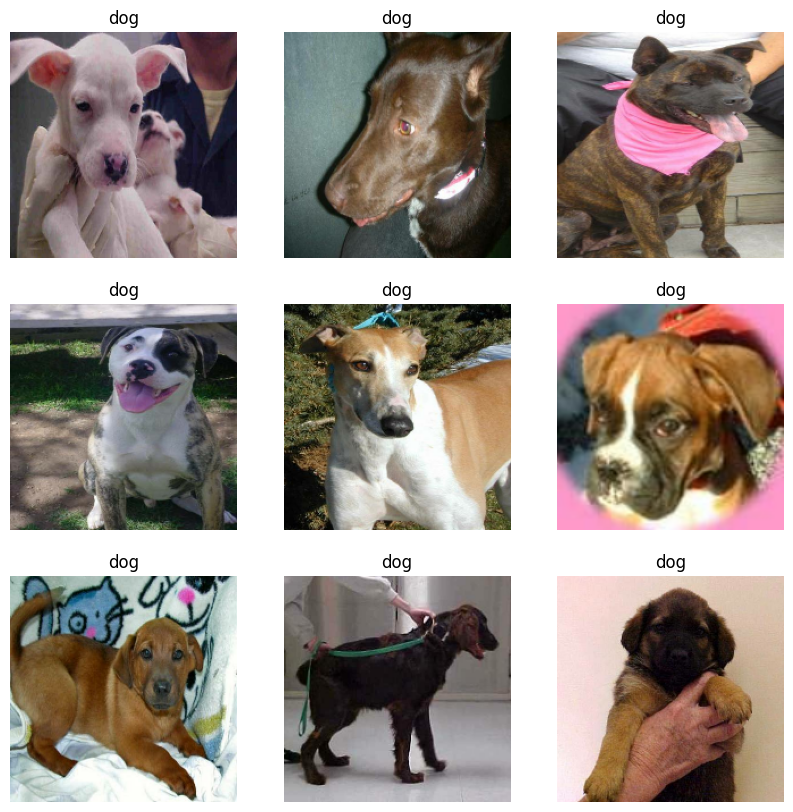

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras import layers
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

c:\Users\Leandro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
from keras.optimizers import Adam


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 200, 200, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,143,970 (19.62 MB)

 Trainable params: 5,143,970 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs=5
history = model.fit( train_ds,validation_data=val_ds, epochs=epochs)

Epoch 1/5


625/625 ━━━━━━━━━━━━━━━━━━━━ 286s 454ms/step - accuracy: 0.6024 - loss: 0.6733 - val_accuracy: 0.7202 - val_loss: 0.5463
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 274s 439ms/step - accuracy: 0.7513 - loss: 0.5059 - val_accuracy: 0.7894 - val_loss: 0.4453
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 249s 398ms/step - accuracy: 0.8016 - loss: 0.4205 - val_accuracy: 0.8030 - val_loss: 0.4270
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 592s 948ms/step - accuracy: 0.8437 - loss: 0.3543 - val_accuracy: 0.7952 - val_loss: 0.4790
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 266s 425ms/step - accuracy: 0.8790 - loss: 0.2860 - val_accuracy: 0.7882 - val_loss: 0.5273


In [11]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/model.keras", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 9, verbose = 1, mode = "auto")
hist = model.fit(train_ds, steps_per_epoch = 100, validation_data = val_ds, validation_steps = 10, epochs = 10, callbacks = [checkpoint, early])

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.9153 - loss: 0.2000
Epoch 1: val_accuracy improved from -inf to 0.73125, saving model to ../models/model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 472ms/step - accuracy: 0.9151 - loss: 0.2002 - val_accuracy: 0.7312 - val_loss: 0.6358
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.8958 - loss: 0.2384
Epoch 2: val_accuracy improved from 0.73125 to 0.79688, saving model to ../models/model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 421ms/step - accuracy: 0.8959 - loss: 0.2383 - val_accuracy: 0.7969 - val_loss: 0.6262
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.9350 - loss: 0.1754
Epoch 3: val_accuracy did not improve from 0.79688
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.9349 - loss: 0.1755 - val_accuracy: 0.7656 - val_loss: 0.5632
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.9120 - loss: 0.2228
Epoch 4: val_accuracy did not improve from 0.79688
1

c:\Users\Leandro\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 7: val_accuracy did not improve from 0.83438
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - accuracy: 0.9382 - loss: 0.1480 - val_accuracy: 0.7969 - val_loss: 0.7175
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9491 - loss: 0.1347
Epoch 8: val_accuracy did not improve from 0.83438
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 437ms/step - accuracy: 0.9491 - loss: 0.1348 - val_accuracy: 0.7531 - val_loss: 0.7075
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.9305 - loss: 0.1674
Epoch 9: val_accuracy did not improve from 0.83438
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.9306 - loss: 0.1672 - val_accuracy: 0.8188 - val_loss: 0.5322
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.9505 - loss: 0.1292
Epoch 10: val_accuracy did not improve from 0.83438
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 396ms/step - accuracy: 0.9505 - loss: 0.1291 - val_accuracy: 0.7812 - val_loss: 0.6801


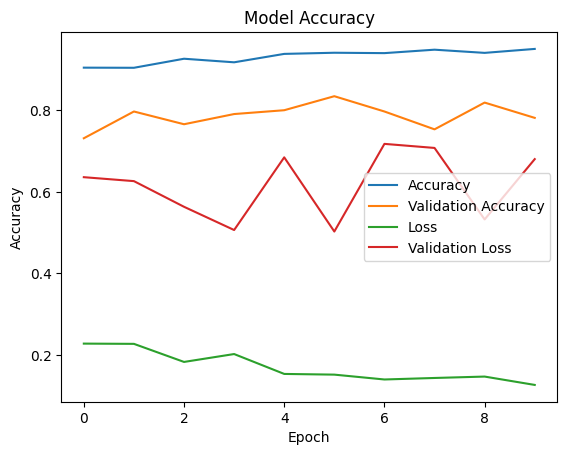

In [13]:
# Trazar los resultados
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configurar el diseño del gráfico
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Trazar
plt.show()

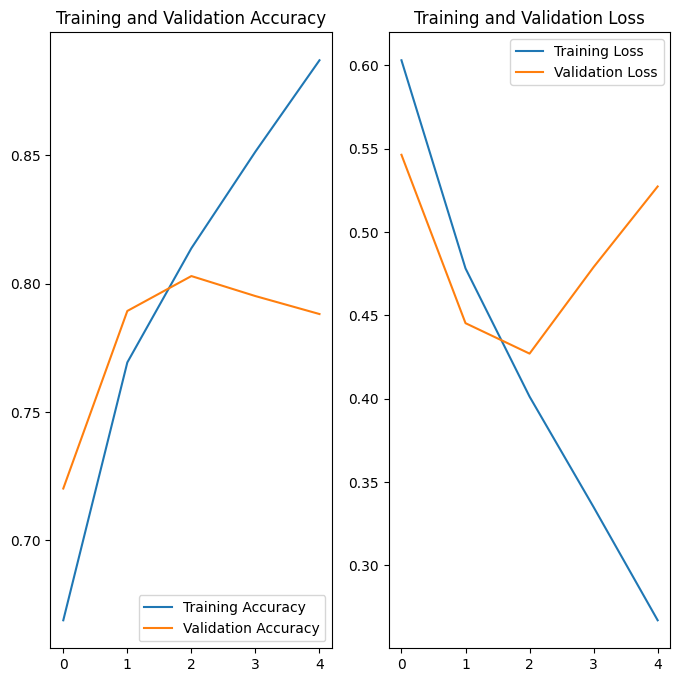

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:


#Creo una variable para la imagen aleatoria

numero= np.random.randint(1000)
image_path = f"../data/raw/cat/cat.{numero}.jpg"


img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
This image most likely belongs to cat with a 99.96 percent confidence.
